In [0]:
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_train.csv
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_test.csv

In [0]:
import pandas as pd
df = pd.read_csv('energy_train.csv')
test_df = pd.read_csv('energy_test.csv')

df = df.fillna(df.mean())
test_df = test_df.fillna(test_df.mean())

tdf = df[['date','WattHour']]
tedf = test_df[['date']]

tdf['date'] = pd.to_datetime(tdf['date'])
tedf['date'] = pd.to_datetime(tedf['date'])

tdf.columns = ['ds','y']
tedf.columns = ['ds']

In [0]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

train_prophet = tdf.copy()
test_prophet = tedf.copy()

!pip install pandas>=1.0.1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


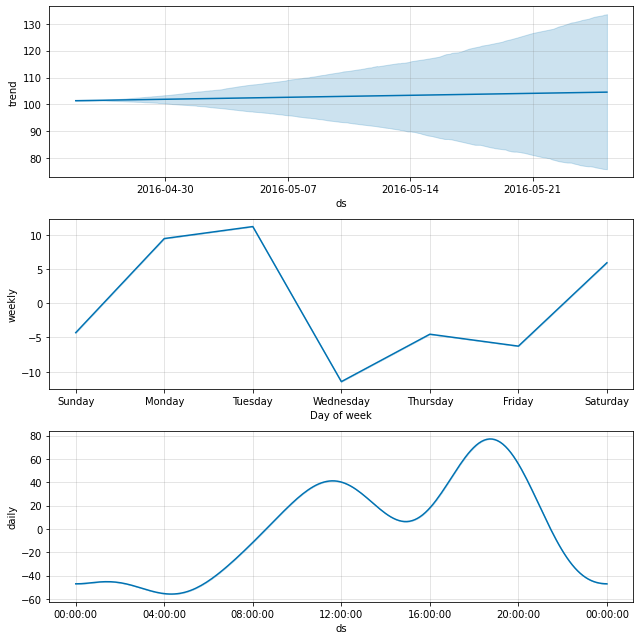

In [0]:
# instantiating the class with custom settings, for the sake of illustration
prophet = Prophet()
# fitting the model
prophet.fit(train_prophet);

# part of the dataframe on which we want to make predictions
# future = test_prophet.drop(['y'], axis=1)

# predicting values
forecast = prophet.predict(test_prophet)

# see https://github.com/facebook/prophet/issues/999 for the matplotlib_converts()
pd.plotting.register_matplotlib_converters()

# plotting the seasonality components found
_ = prophet.plot_components(forecast)

In [0]:
forecast[['ds','yhat']]

y_pred = forecast['yhat']
y_pred = y_pred.round(0).astype('int64')
output = pd.DataFrame({'id': test_df.id,
                       'WattHour': y_pred})
output.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')

In [1]:
y_pred

NameError: ignored